# CNN Algorithms Histoty
https://hoya012.github.io/blog/deeplearning-classification-guidebook-1/

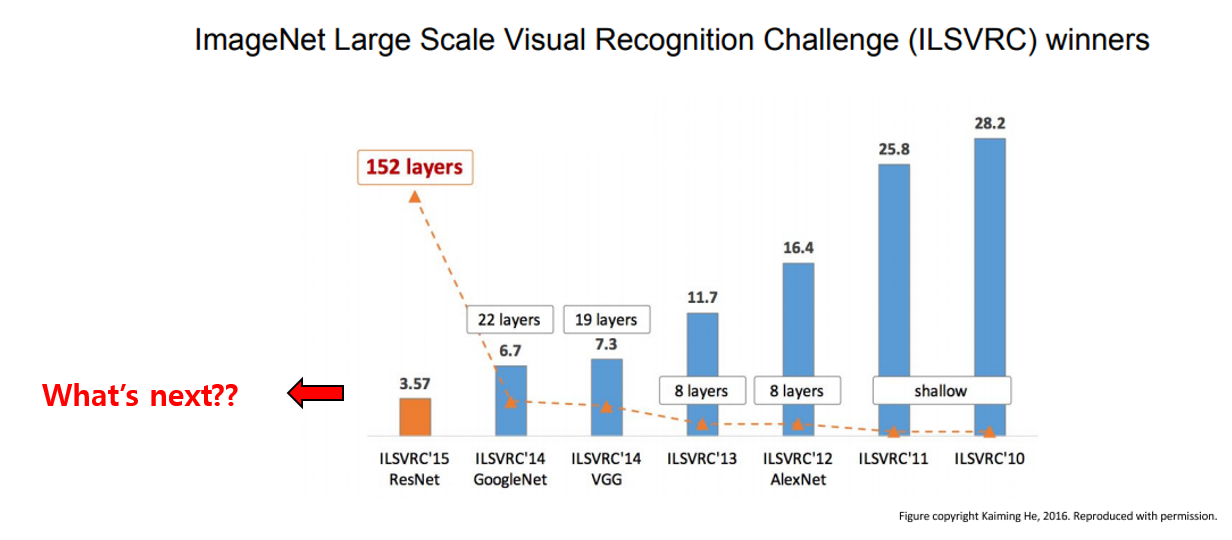

## [1] LeNet :  1998, Yann LeCun 
논문 : Gradient-Based Learning Applied to Document Rocognition

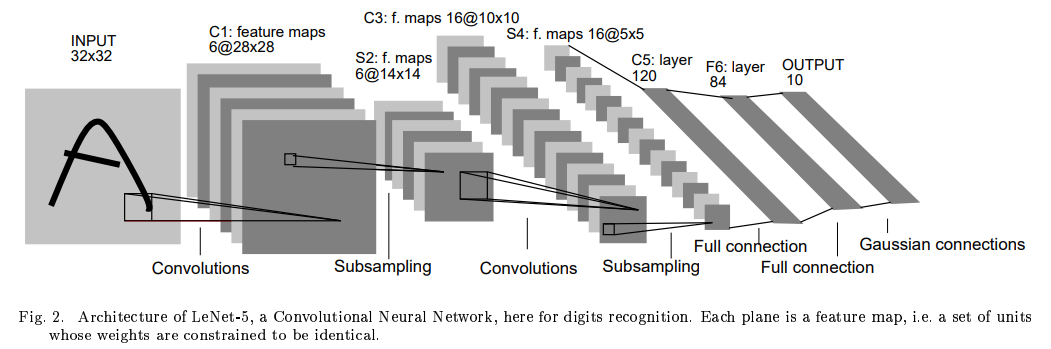

- activation 함수 : tanh() 사용  , relu가 발표되기 이전에 나옴 
- optimizer : SGD(Stochastic Gradient Descent) 사용
- subsampling : Average Pooling 사용
- learning rate decay : epoch를 진행할수록 learning rate을 점차 줄여가며 학습에 사용함

In [1]:
import tensorflow as tf

In [2]:
model=tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(filters=6, kernel_size=(5,5), strides=1,activation='tanh',padding='same', input_shape=(32,32,1)))
model.add(tf.keras.layers.AvgPool2D(pool_size=2, strides=2, padding='valid'))  
                            
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=5,strides=1, activation='tanh',padding='valid'))
model.add(tf.keras.layers.AvgPool2D(pool_size=2, strides=2, padding='valid'))                              

model.add(tf.keras.layers.Conv2D(filters=120, kernel_size=5, strides=1, activation='tanh', padding='valid'))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(84, activation='tanh'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

model.summary()

C:\Users\storm\anaconda3\envs\tf217\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 16, 16, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 12, 12, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 6, 6, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 2, 2, 120)           │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 480)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 84)                  │          40,404 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 91,946 (359.16 KB)

 Trainable params: 91,946 (359.16 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
model.compile( loss='sparse_categorical_crossentropy' , optimizer = tf.keras.optimizers.SGD() )

#### LearningRateScheduler
- epoch 수행 후 현재의 epoch, learning rate 반환하고 업데이트된 learning rate를 optimizer에 적용함  

In [4]:
from tensorflow.keras.callbacks import LearningRateScheduler

In [5]:
def learning_rate(epochs):
    if epochs > 9:
        lr =1e-9 
    elif epochs>5:
        lr = 5e-5
    elif epochs > 3:
        lr= 3e-4
    else:
        lr =5e-4 
    return lr

In [6]:
learning_rate(1),learning_rate(4),learning_rate(6),learning_rate(10) 
# epoch가 커질수록 학습률 감소

(0.0005, 0.0003, 5e-05, 1e-09)

In [7]:
lr = tf.keras.callbacks.LearningRateScheduler(learning_rate)  # 함수를 인자로 사용

In [8]:
# SGD
# https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD
tf.keras.optimizers.SGD(learning_rate=0.01) # 기본 값 : 0.01

In [9]:
# callback LearningRateScheduler  
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.reshape(-1,28,28,1)

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(filters=6, kernel_size=(5,5), 
                                 strides=1,activation='tanh',padding='same', input_shape=(28,28,1)))
model.add(tf.keras.layers.AvgPool2D(pool_size=2, strides=2, padding='valid'))                              
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=5,
                                 strides=1, activation='tanh',padding='valid'))
model.add(tf.keras.layers.AvgPool2D(pool_size=2, strides=2, padding='valid'))                              

model.add(tf.keras.layers.Conv2D(filters=120, kernel_size=5,
                                 strides=1, activation='tanh', padding='valid'))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(84, activation='tanh'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))


model.compile( loss='sparse_categorical_crossentropy' , optimizer = tf.keras.optimizers.SGD() )

model.fit(X_train,y_train, epochs=10, callbacks=[lr]) #callbacks 리스트 형태로 넣음 

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.9860 - learning_rate: 5.0000e-04
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.9385 - learning_rate: 5.0000e-04
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.5936 - learning_rate: 5.0000e-04
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.4587 - learning_rate: 5.0000e-04
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.3898 - learning_rate: 3.0000e-04
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.3618 - learning_rate: 3.0000e-04
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.3404 - learning_rate: 5.0000e-05
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.3311 - learning_rate: 5.0000e-05
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.3290 - learning_rate: 5.0000e-05
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.3276 - learning_rate: 5.0000e-05


## [2] AlexNet   : 2012 Winner  , Alex, SuperVision 팀
- ImageNet Large Scale Visual Recognition Challenge(ILSSVRC 2012 contest) 에서 우승하면서 인기 많아짐
- 이전보다 효율적으로 computing resource 사용
- 논문: ImageNet Classification with Deep Convolutonal Neural Networks by Hinton

### 차이점
- GPU 사용 :두개로 쪼갠 이유 -> 3G 2개의 GPU cuda 이용해도 당시 하드웨어 성능때문에 쪼개서 사용
    - 좋은 결과를 위해 학습 데이터 양이 많이 필요한데 학습하려면 연산량이 많음
        - couvolution layer: data Parallelism
            - convolution 연산에서 이미지의 픽셀을 옮겨가면서 반복적인 행렬연산의 수행         
        - Fully connected layer : Model Parallelism
 
    - 색상 무관한 48개 fautures & 색상 관련 48개 fautures
    
- stride = 4: 학습시간 오래걸려서 
- kernel size도 큼 11 11 3
- zero-padding 사용 (크기 맞춤)
- Max Pooling & overlapping pooling
    -  일반적으로 convolution통해 얻은feature map 크기를 줄이기 위해사용하는데 window 크기에 맞춰 stride를 지정하여 겹치지 않게 하는데 더 stride를 작게하여 겹치도록 함
- 정규화기법으로 Local Response Normalization 사용 : 성능에 영향 없음 , 최근에 거의 사용되지 않음 ,최근에는 BN(Batch Normalization)을 많이 사용 : Training 할 때는 mini-batch의 평균과 분산으로 normalize 하고, Test 할 때는 계산해놓은 이동 평균으로 normalize 한다  
- **ReLU**: rectified여서 학습 속도가 빠르고 역전파에서 간단해지게 됨 gradient vanishing 방지-> 표준화 됨!!! 

2. 과적합 방지를 위한 전략 
    A. data augmentation 철저하게함(transitional invariant!)
      -학습 데이터 양을 늘리게 되면 학습시간일 길어지게됨
      - 256 x 256 ->224 x 224 크기로 무작위
      - RGB channel 값 변환
    B. **DropOut**
      - dropout 을 ensemble technique으로 사용( voting, co-adaptataion 피함)
      > [Improving neural networks by preventing co-adaptation of feature detectors](https://arxiv.org/pdf/1207.0580.pdf）
      - 없더라도 **학습시에만 랜덤하게 없애기 때문에** 모델을 만들어도 합쳐서 하나의 최종 모델을 만듦 (집단지성)
      - batch normalization이 생기면서 역할이 조금 줄어듦
- **initialize**
- batch size 크기 키움
- optimizer : SGD 와 Momentum 
- learning rate decay를 Plateu(고원현상이 지속되면)/어느정도 성능이 안 떨어지면 learning rate를 줄임 
- 초기값에 따른 다른 모델 7개 CNN 만들어서 ensemble 해서 성능 향상
  optimizer, ensemble  - 가우시안 분포 기반으로 평균냄(bagging과 비슷)
- weight decay

현대의 대부분의 기법이 여기에서 기반이 됨.
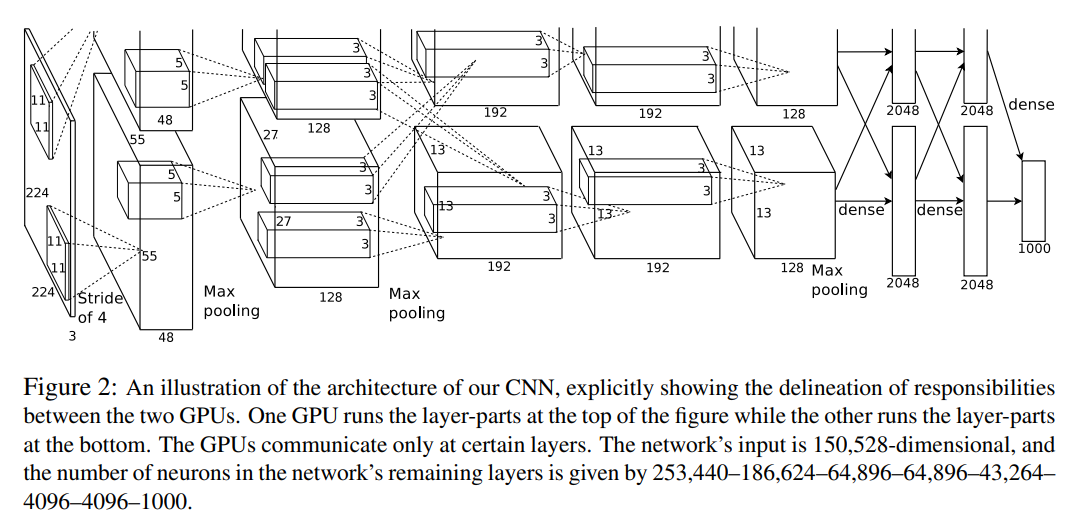

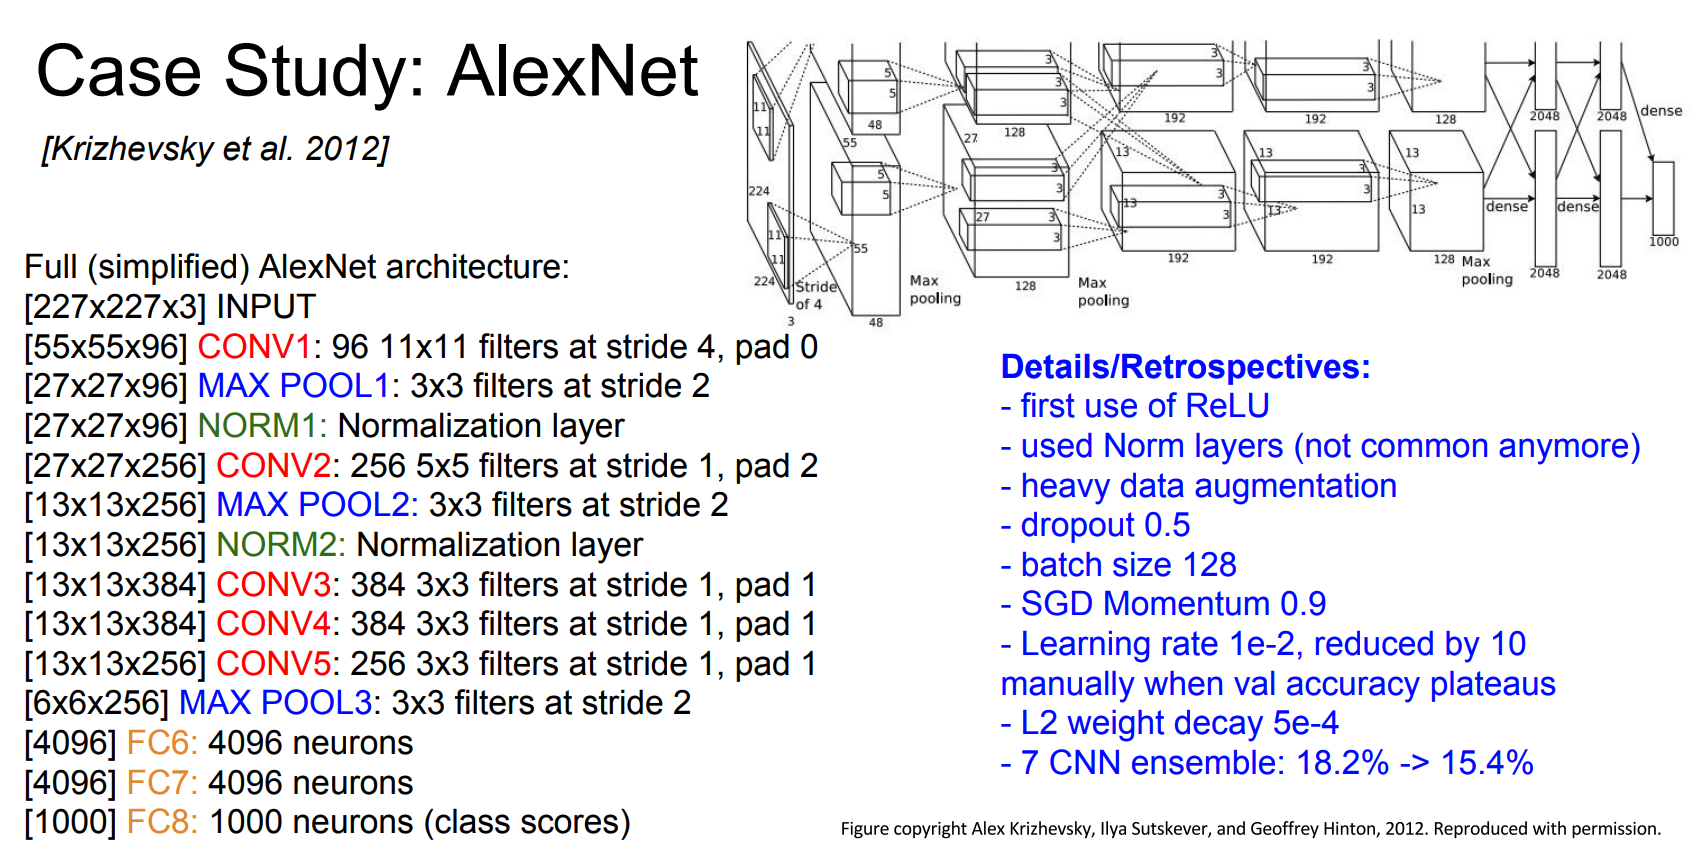
참고. CS231n 2017 9강 TensorFlow 이용해서 구현

In [10]:
model = tf.keras.models.Sequential()

#2 의 배수인 이유는 CPU 할당하기 위해서 
model.add(tf.keras.layers.Conv2D(filters=96,kernel_size=11, strides=4,padding='valid',
                                 kernel_regularizer = tf.keras.regularizers.l2(0.005),activation='relu', input_shape=(227,227,3)) )
model.add(tf.keras.layers.MaxPool2D(pool_size=(3,3),strides=(2,2) ))
#model.add(LRN() ) #케라스에 없어서.

model.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3, strides=1,padding='same', activation='relu') )
model.add(tf.keras.layers.MaxPool2D(pool_size=(3,3),strides=2 ,padding='valid' ))
#model.add(LRN() ) 
model.add(tf.keras.layers.Conv2D(filters=384,kernel_size=3, strides=1,padding='same',
                                 kernel_regularizer = tf.keras.regularizers.l2(0.005),  activation='relu') )

model.add(tf.keras.layers.Conv2D(filters=384,kernel_size=3, strides=1,padding='same',
                                 kernel_regularizer = tf.keras.regularizers.l2(0.005),  activation='relu') )

model.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3, strides=1,padding='same',
                                 kernel_regularizer = tf.keras.regularizers.l2(0.005),  activation='relu') )
model.add(tf.keras.layers.MaxPool2D(pool_size=(3,3),strides=2 ,padding='valid' ))

#여기서 FC layer 2개를 사용함 
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(4096, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5)) #2048 개를 랜덤하게 제외

model.add(tf.keras.layers.Dense(4096, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5)) #2048 개를 랜덤하게 제외

model.add(tf.keras.layers.Dense(1000, activation='softmax'))

model.summary() 

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 55, 55, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 27, 27, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 27, 27, 256)         │         221,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 13, 13, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 13, 13, 384)         │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 13, 13, 256)         │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4096)                │      37,752,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1000)                │       4,097,000 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61,985,128 (236.45 MB)

 Trainable params: 61,985,128 (236.45 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
#learning rate decay 대신 다른 기법으로 learning rate바꿈   
#learning rate scheduler: #성능 차이가 없으면 plateau(고원,편평한곳)현상 생기면 learning rate 줄이도록 callback이용
model.compile(loss='categorical_crossentropy' ,
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.9))

### ReduceLROnPlateau
- `ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0, **kwargs)`
- patience=10 10번동안 min_delta(threshold) 만큼 변하지 않으면 learnig rate를  10%(factor =0.1)씩 줄임

    patience: number of epochs with no improvement after which learning rate

In [12]:
pf = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1) 

In [13]:
# 실행 안됨  : input (227,227,3) 인 데이터 필요
# model.fit(X_train, y_train, epochs= 90, batch_size=128, callbacks=[pf])

## [3] ZFNet, 2013 winner , Clarifai 팀의 Zeiler와 Fergus

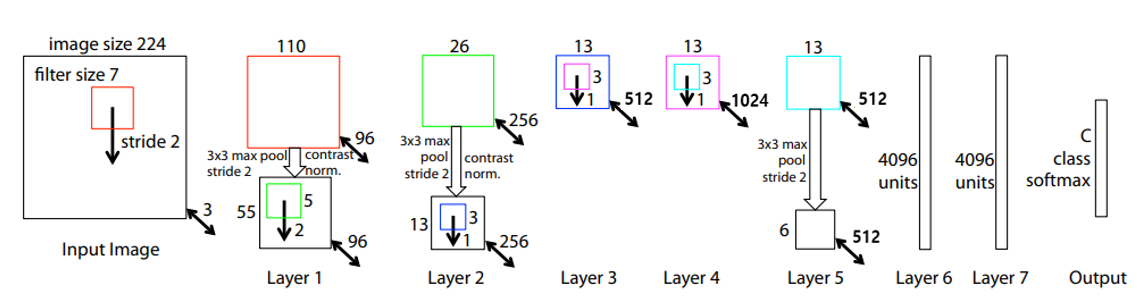

AlexNet을 기반으로 첫 Conv layer의 filter size를 11에서 7로, stride를 4에서 2로 바꾸고, 그 뒤의 Conv layer들의 filter 개수를 키워주는 등(Conv3,4,5: 384, 384, 256 –> 512, 1024, 512) 약간의 튜닝

## [4] VGG : 2014 2nd , Visual Geometry Group in Oxford
https://bskyvision.com/504

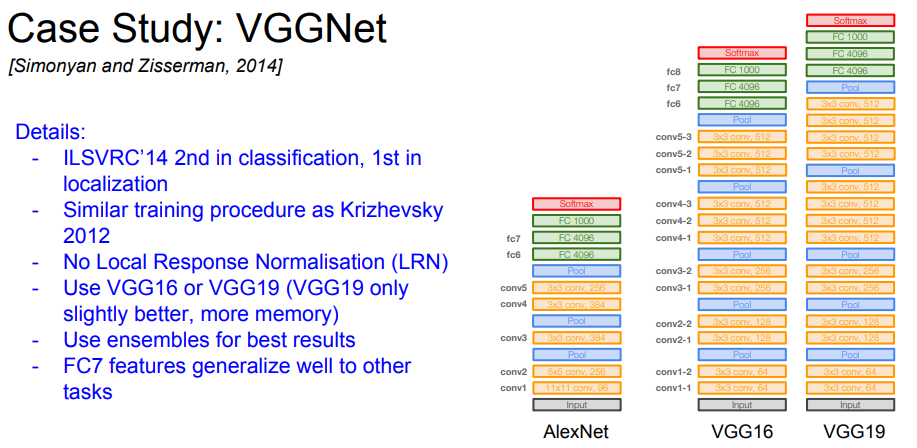

In [14]:
import tensorflow as tf
vgg = tf.keras.applications.VGG19()
vgg.summary()

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 143,667,240 (548.05 MB)

 Trainable params: 143,667,240 (548.05 MB)

 Non-trainable params: 0 (0.00 B)

## [5] GoogLeNet : 2014 Winner, Inception 

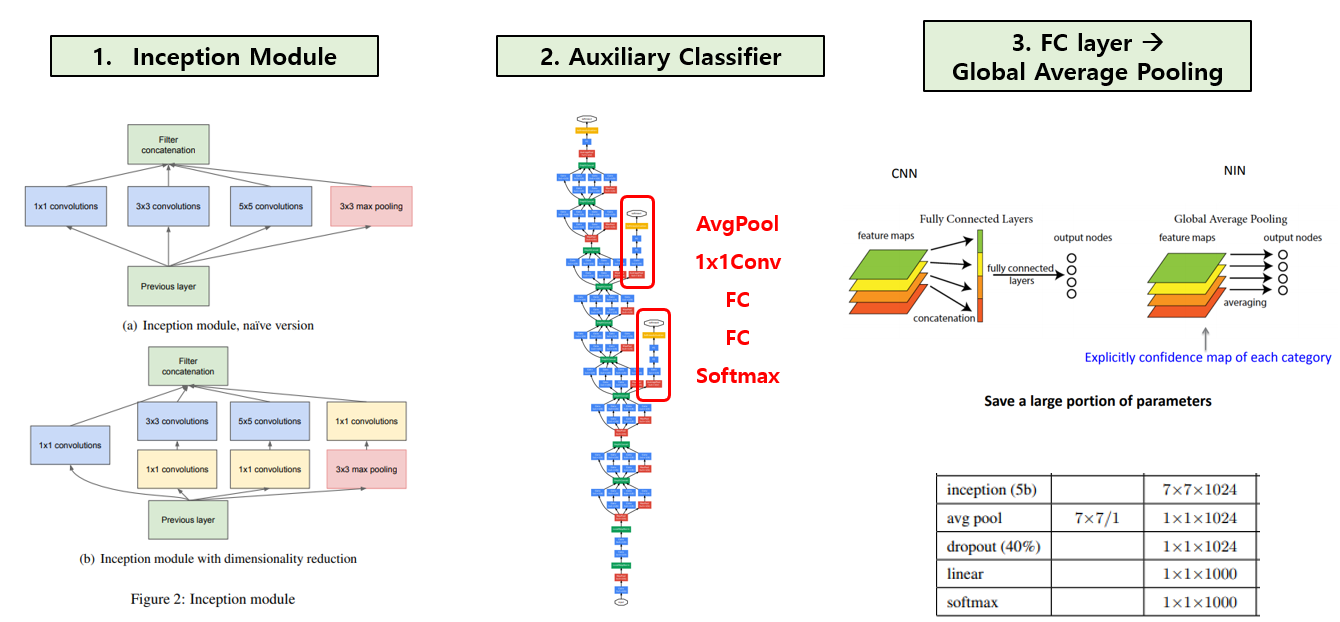

## [6] ResNet  : 2015 Winner, Microsoft 

2015년 1위, 인간보다 뛰어난 결과
- 논문: Deep Residual Learining for Image Recognition
- Residual Learning 
    - identity shortcut connection
- Batch Normalizaton
  - degradation 문제를 해결
  - 152개의 레이어를 깊게 쌓아도 학습이 잘됨

In [15]:
#Transfer learning 남이 만든 모델 가져옴, include_top dense 가져오면 학습시킨거 그대로 사용하는것
tf.keras.applications.VGG16 #2014
tf.keras.applications.ResNet50 #inception으로 확장 인간을 넘음.

<function keras.src.applications.resnet.ResNet50(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000, classifier_activation='softmax', name='resnet50')>

In [16]:
 # 다운로드 시간 약 2분 소요, 처음에만 다운로드하고 그 다음부터 캐쉬되어 바로 사용 가능
resnet=tf.keras.applications.ResNet50( )
vgg=tf.keras.applications.VGG16()

In [17]:
vgg.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
resnet.summary() #connected to -> multi-inputs&outputs

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)    │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 230, 230, 3)       │               0 │ input_layer_4[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 112, 112, 64)      │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 112, 112, 64)      │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 112, 112, 64)      │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 114, 114, 64)      │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 56, 56, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 56, 56, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 56, 56, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [19]:
tf.keras.utils.plot_model(resnet) #multi inputs & outputs  -> stacking 

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [20]:
resnet.inputs  , resnet.outputs

([<KerasTensor shape=(None, 224, 224, 3), dtype=float32, sparse=None, name=keras_tensor_206>],
 [<KerasTensor shape=(None, 1000), dtype=float32, sparse=False, name=keras_tensor_382>])

In [21]:
len(resnet.layers) # 177layers

177

In [22]:
len(tf.keras.applications.ResNet50( include_top=False ).layers) # dense 없는 경우 175 layers

175

In [23]:
resnet.layers[18] #전체에서 위치 기반으로

<Activation name=conv2_block1_out, built=True>

In [24]:
resnet.get_layer('conv5_block1_3_conv') # 이름 기반으로

<Conv2D name=conv5_block1_3_conv, built=True>

In [25]:
len(resnet.get_layer('conv5_block1_3_conv').weights )

2

In [26]:
len(resnet.get_layer('conv5_block3_3_bn').weights ) #batch normalization

4

In [27]:
resnet.get_layer('conv5_block3_3_bn').output #layer 구성 알 수 있음 

<KerasTensor shape=(None, 7, 7, 2048), dtype=float32, sparse=False, name=keras_tensor_378>

ResNet 이후에는 간단한데 좋은 성능을 내는 모델로 경향이 바뀌었음
> 오컴의 면도날: 같은 성능이면 간단한게 좋다!

In [28]:
tf.keras.applications.EfficientNetB0, tf.keras.applications.mobilenet  #Efficient, mobile 더 간단한 구조

(<function keras.src.applications.efficientnet.EfficientNetB0(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000, classifier_activation='softmax', name='efficientnetb0')>,
 <module 'keras.api.applications.mobilenet' from 'C:\\Users\\storm\\anaconda3\\envs\\tf217\\lib\\site-packages\\keras\\api\\applications\\mobilenet\\__init__.py'>)

### Normalization
Normalization(featrue scaling)
- 데이터 처리에 있어 각 특성의 스케일을 조정한다는 의미로, 값 범위의 차이를 왜곡시키지 않고 데이터 세트를 공통 스케일로 변경
  - 값 범위가 크면 큰 영향이 있어서 범위 조절

>  2015년 Batch Normalization
 - 가장 범용적으로 복잡한 모델에 적합
 - weight, layer ,instance, group Normalization으로 발전

In [29]:
tf.keras.layers.Dense(64, activation='relu')  #이렇게는 BN 중간 삽입이 불가

<Dense name=dense_7, built=False>

In [30]:
tf.keras.layers.Dense(64)
tf.keras.layers.BatchNormalization() #batch normalization :범위 줄여줌
tf.keras.layers.Activation('relu')

<Activation name=activation, built=False>

resnet batchnormalizatoin 적용해서 레이어가 152개 여도 학습이 잘 됨
- Stacking 통해서 반복적으로 레이어 쌓음
- 규모가 커지는 경우 학습 속도를 빠르게하기 때문에 중요

In [31]:
model=tf.keras.applications.ResNet152()

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 100835be76be38e30d865e96f2aaae62 so we will re-download the data.
242900224/242900224 ━━━━━━━━━━━━━━━━━━━━ 1295s 5us/step


In [32]:
model.summary() # conv - batch normalization - activation 형태로 반복해서 stacking함

Model: "resnet152"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)    │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 230, 230, 3)       │               0 │ input_layer_7[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 112, 112, 64)      │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 112, 112, 64)      │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 112, 112, 64)      │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 114, 114, 64)      │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 56, 56, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 56, 56, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 56, 56, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 60,419,944 (230.48 MB)

 Trainable params: 60,268,520 (229.91 MB)

 Non-trainable params: 151,424 (591.50 KB)

In [43]:
# tf.keras.utils.plot_model(model) 

- 코드 참고: https://www.tensorflow.org/tutorials/images/classification?hl=ko
  -  관례상 2의 배수  사용 : GPU 연산
  -  vgg 3x3:  클수록 큰 특징을 찾지만 작은것을 여러개 겹치면 비선형성 증가해서 큰거와 비슷하거나 더 좋은 성능을 냄.갯수가 작은 kernel filter 여러개를 겹치면 더 좋음
  - AlexNet과 마찬가지로 레이어가 많이 없어 relu 사용
  - ResNet과 같이 레이어 많을 수 복잡한 문제 해결할 수 있지만 학습이 안 되기 때문에 Batch Normalization 사용

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
img_height = 224
img_width = 224

model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5)
])

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)              │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 224, 224, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 112, 112, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 112, 112, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 56, 56, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 56, 56, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 128)                 │       6,422,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,446,885 (24.59 MB)

 Trainable params: 6,446,885 (24.59 MB)

 Non-trainable params: 0 (0.00 B)